In [440]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [441]:
import numpy as np
import pandas as pd

In [442]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [443]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [444]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [445]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [459]:
#to view the table
Base.metadata.tables
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [460]:
# Save references to each table
#saving mmeasurement Table
Measurement = Base.classes.measurement

#saving Station table
Station = Base.classes.station


In [461]:
#want to inspect each tables
inspector = inspect(engine)
inspector.get_table_names()
Measurement_columns = inspector.get_columns("measurement")
Station_columns = inspector.get_columns("station")

In [462]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [463]:
measurement_columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [475]:
#query to get the last date
session.query(Measurement.date)[-1]

('2017-08-23')

# Exploratory Climate Analysis

In [408]:
# Design a query to retrieve the last 12 months of precipitation data 
#and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

queryresult = session.query(Measurement.date,Measurement.prcp).\
filter(Measurement.date >= '2016-08-23').all()


In [340]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Measurement_df = pd.DataFrame(queryresult)
Measurement_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [363]:
# Sort the dataframe by date
Measurement_df = Measurement_df.set_index(Measurement_df.date)
Measurement_df = Measurement_df.sort_index()
#Measurement_df = Measurement_df.reset_index(inplace=False)

Measurement_df

,prcp,date
date,,
2016-08-23,0.00,2016-08-23
2016-08-23,NaN,2016-08-23
2016-08-23,1.79,2016-08-23
2016-08-23,0.05,2016-08-23
2016-08-23,0.15,2016-08-23
...,...,...
2017-08-22,0.00,2017-08-22
2017-08-23,0.00,2017-08-23
2017-08-23,0.00,2017-08-23


In [364]:
#remove all null values
Measurement_df.dropna()

,prcp,date
date,,
2016-08-23,0.00,2016-08-23
2016-08-23,1.79,2016-08-23
2016-08-23,0.05,2016-08-23
2016-08-23,0.15,2016-08-23
2016-08-23,0.70,2016-08-23
...,...,...
2017-08-22,0.00,2017-08-22
2017-08-23,0.00,2017-08-23
2017-08-23,0.00,2017-08-23


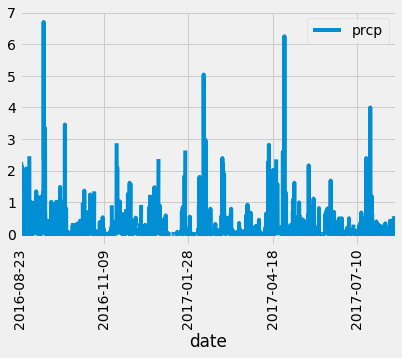

In [365]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plot the results using the DataFrame `plot` method.
Measurement_df.plot(rot = 90)

In [366]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#using 'describe' get all the stats summary 
Measurement_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [373]:
# Design a query to show how many stations are available in this dataset?
Station_count = session.query(func.count(Station.station)).all()
Station_count

[(9)]

In [418]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [422]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#Hint: You may need to use functions such as `func.min`, `func.max`, 
#`func.avg`, and `func.count` in your queries.
#the most active satation is = ('USC00519281', 2772),
 
session.query(Measurement.station, func.min(Measurement.tobs),\
func.max(Measurement.tobs),func.count(Measurement.tobs),\
func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 2772, 71.66378066378067)]

In [437]:
# Choose the station with the highest number of temperature observations.

tempresult = session.query(Measurement.tobs).\
filter(Measurement.date >= '2016-08-23').\
filter(Measurement.station == 'USC00519281').all()
#save in a pandas Dataframe
temp_df = pd.DataFrame(tempresult)
temp_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


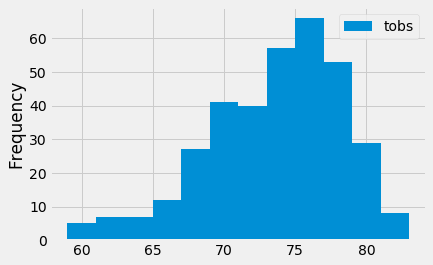

In [439]:
# Query the last 12 months of temperature observation data for this station 
#and plot the results as a histogram
#Plot the results as a histogram with `bins=12`.

temp_df.plot.hist(bins=12)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
